## The Life Expectancy and Income
_by Mohammad Fazlan bin Harun_

About the dataset:

Data source : https://databank.worldbank.org/source/world-development-indicators

Database: World Development Indicators  
Countries: check all "Countries" (not All or Aggregates)  
Series: Life expectancy at birth, total (years) [SP.DYN.LE00.IN]    
          Population, total [SP.POP.TOTL]    
        GDP per capita, PPP (current international $)(NY.GDP.PCAP.PP.CD)      
Time:   check all years

layout > orientation > popular > Orientation 4 ( Series on page, Time on Column, Country on Row)

Life expectancy at birth, total (years)   
-indicates the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life.  
-Life expectancy at birth used here is the average number of years a newborn is expected to live if mortality patterns at the time of its birth remain constant in the future. It reflects the overall mortality level of a population, and summarizes the mortality pattern that prevails across all age groups in a given year.

Population   
-total is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are mid-year estimates.	

GDP per capita, PPP (current international $)	
-This indicator provides per capita values for gross domestic product (GDP) expressed in current international dollars converted by purchasing power parity (PPP) conversion factor. 
GDP is the sum of gross value added by all resident producers in the country plus any product taxes and minus any subsidies not included in the value of the products.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv(r'C:\Users\User\Desktop\Python Project Jupyter\Life expectancy and income\Data_WB_Life_Expectancy.csv')
data.head(10)

,Time,Time Code,Country Name,Country Code,"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Population, total [SP.POP.TOTL]","GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]"
0,1960,YR1960,Afghanistan,AFG,32.446,8996967,..
1,1960,YR1960,Albania,ALB,62.283,1608800,..
2,1960,YR1960,Algeria,DZA,46.141,11057864,..
3,1960,YR1960,American Samoa,ASM,..,20127,..
4,1960,YR1960,Andorra,AND,..,13410,..
5,1960,YR1960,Angola,AGO,37.524,5454938,..
6,1960,YR1960,Antigua and Barbuda,ATG,61.968,54132,..
7,1960,YR1960,Argentina,ARG,65.055,20481781,..
8,1960,YR1960,Armenia,ARM,65.972,1874119,..
9,1960,YR1960,Aruba,ABW,65.662,54208,..


In [3]:
data.columns

Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
       'Population, total [SP.POP.TOTL]',
       'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]'],
      dtype='object')

In [4]:
data.shape

(13454, 7)

In [5]:
data.rename(
    columns={
        'Time':'Year',
        'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]':'GDP_per_capita',
        'Population, total [SP.POP.TOTL]':'Population',
        'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]':'Life_expectancy'
    },inplace=True)

data.head(2)

,Year,Time Code,Country Name,Country Code,Life_expectancy,Population,GDP_per_capita
0,1960,YR1960,Afghanistan,AFG,32.446,8996967,..
1,1960,YR1960,Albania,ALB,62.283,1608800,..


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13454 entries, 0 to 13453
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             13454 non-null  int64 
 1   Time Code        13454 non-null  object
 2   Country Name     13454 non-null  object
 3   Country Code     13454 non-null  object
 4   Life_expectancy  13454 non-null  object
 5   Population       13454 non-null  object
 6   GDP_per_capita   13454 non-null  object
dtypes: int64(1), object(6)
memory usage: 735.9+ KB


In [7]:
data.isna().sum()

Year               0
Time Code          0
Country Name       0
Country Code       0
Life_expectancy    0
Population         0
GDP_per_capita     0
dtype: int64

In [8]:
((data['GDP_per_capita'])=='..').sum()

7684

In [9]:
(data=='..').sum()

Year                  0
Time Code             0
Country Name          0
Country Code          0
Life_expectancy    1524
Population          259
GDP_per_capita     7684
dtype: int64

In [10]:
data= data.replace("..", np.nan)
(data=='..').sum()

Year               0
Time Code          0
Country Name       0
Country Code       0
Life_expectancy    0
Population         0
GDP_per_capita     0
dtype: int64

In [11]:
data= data.assign(
    Population = pd.to_numeric(data.Population),
    GDP_per_capita = pd.to_numeric(data.GDP_per_capita),
    Life_expectancy = pd.to_numeric(data.Life_expectancy)
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13454 entries, 0 to 13453
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             13454 non-null  int64  
 1   Time Code        13454 non-null  object 
 2   Country Name     13454 non-null  object 
 3   Country Code     13454 non-null  object 
 4   Life_expectancy  11930 non-null  float64
 5   Population       13195 non-null  float64
 6   GDP_per_capita   5770 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 735.9+ KB


In [12]:
data.isnull().sum()

Year                  0
Time Code             0
Country Name          0
Country Code          0
Life_expectancy    1524
Population          259
GDP_per_capita     7684
dtype: int64

In [13]:
'Malaysia' in (data['Country Name']).values

True

In [14]:
data.dropna(inplace=True)
data.isnull().sum()

Year               0
Time Code          0
Country Name       0
Country Code       0
Life_expectancy    0
Population         0
GDP_per_capita     0
dtype: int64

In [15]:
data['Population (million)'] = data['Population']/1000000
data['GDP_per_capita (thousand)'] = data['GDP_per_capita']/1000
data.drop(columns=['GDP_per_capita','Population','Time Code'],inplace=True)
data.set_index('Country Code',inplace = True)
data.head()

,Year,Country Name,Life_expectancy,Population (million),GDP_per_capita (thousand)
Country Code,,,,,
ALB,1990,Albania,71.836,3.286542,2.548112
DZA,1990,Algeria,66.938,25.758872,6.912087
AGO,1990,Angola,45.306,11.848385,3.279222
ATG,1990,Antigua and Barbuda,71.520,0.062533,11.586780
ARG,1990,Argentina,71.594,32.618648,7.191105


In [16]:
# select year
df = data[(data['Year'] == 2020)]
df.head()

,Year,Country Name,Life_expectancy,Population (million),GDP_per_capita (thousand)
Country Code,,,,,
AFG,2020,Afghanistan,65.173,38.928341,2.078649
ALB,2020,Albania,78.686,2.837849,13.412097
DZA,2020,Algeria,77.063,43.851043,11.324236
AGO,2020,Angola,61.487,32.866268,6.445433
ATG,2020,Antigua and Barbuda,77.146,0.097928,18.241868


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, AFG to ZWE
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       181 non-null    int64  
 1   Country Name               181 non-null    object 
 2   Life_expectancy            181 non-null    float64
 3   Population (million)       181 non-null    float64
 4   GDP_per_capita (thousand)  181 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.5+ KB


In [18]:
# GDP total, log
df["gdp_total"] = df["GDP_per_capita (thousand)"] * df["Population (million)"]
df["log_gdp"] = np.log(df["GDP_per_capita (thousand)"])
df["log_gdp_total"] = np.log(df["gdp_total"])
df.head(10)

,Year,Country Name,Life_expectancy,Population (million),GDP_per_capita (thousand),gdp_total,log_gdp,log_gdp_total
Country Code,,,,,,,,
AFG,2020,Afghanistan,65.173000,38.928341,2.078649,80.918342,0.731718,4.393441
ALB,2020,Albania,78.686000,2.837849,13.412097,38.061507,2.596157,3.639203
DZA,2020,Algeria,77.063000,43.851043,11.324236,496.579551,2.426945,6.207744
AGO,2020,Angola,61.487000,32.866268,6.445433,211.837324,1.863372,5.355819
ATG,2020,Antigua and Barbuda,77.146000,0.097928,18.241868,1.786390,2.903719,0.580197
ARG,2020,Argentina,76.813000,45.376763,20.770726,942.508330,3.033545,6.848545
ARM,2020,Armenia,75.224000,2.963234,13.312114,39.446908,2.588674,3.674956
AUS,2020,Australia,83.200000,25.693267,53.316885,1369.884973,3.976253,7.222482
AUT,2020,Austria,81.192683,8.916864,55.685970,496.544224,4.019728,6.207673


In [19]:
df.describe()

,Year,Life_expectancy,Population (million),GDP_per_capita (thousand),gdp_total,log_gdp,log_gdp_total
count,181.0,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,2020.0,72.790470,42.011304,21.229429,722.201572,2.488824,4.510836
std,0.0,7.335254,151.433769,21.837967,2558.150869,1.154214,2.175755
min,2020.0,53.679000,0.063903,0.771163,0.284692,-0.259855,-1.256348
25%,2020.0,67.561000,2.351625,5.123826,27.330338,1.633901,3.307997
50%,2020.0,74.213000,8.947027,13.069176,93.216291,2.570256,4.534922
75%,2020.0,77.928000,31.255435,31.482680,443.177754,3.449438,6.093971
max,2020.0,85.387805,1410.929362,117.846137,24283.173526,4.769380,10.097539


In [20]:
life_expectancy_Malaysia2020 = df[(df['Country Name'] == 'Malaysia')]
life_expectancy_Malaysia2020

,Year,Country Name,Life_expectancy,Population (million),GDP_per_capita (thousand),gdp_total,log_gdp,log_gdp_total
Country Code,,,,,,,,
MYS,2020,Malaysia,76.306,32.365998,27.923688,903.77802,3.329475,6.806584


Average life expectancy across the 181 countries in 2020 is 72 years, with a range of 54 to 86. Thus, there is substantial variation in the average length of life across countries. For a comparison to Malaysia (my country), Malaysia is at the upper half of the range where Malaysian citizen expected to live around 76-years-old and 3 months.

In [21]:
'''life_expectancy_Malaysia =  data[(data['Country Name'] == 'Malaysia')]
life_expectancy_Malaysia'''

"life_expectancy_Malaysia =  data[(data['Country Name'] == 'Malaysia')]\nlife_expectancy_Malaysia"

In [22]:
sorted_by_life_expectancy = df.sort_values(by=['Life_expectancy'])

print('Countries with the lowest life expectancy are from :')
(sorted_by_life_expectancy [['Country Name']].head())

Countries with the lowest life expectancy are from :


,Country Name
Country Code,
CAF,Central African Republic
TCD,Chad
LSO,Lesotho
NGA,Nigeria
SLE,Sierra Leone


In [23]:
print('''Countries with the highest life expectancy are from East Asian countries and South East Asian (Singapore)''')
sorted_by_life_expectancy [['Country Name']].tail()

Countries with the highest life expectancy are from East Asian countries and South East Asian (Singapore)


,Country Name
Country Code,
KOR,"Korea, Rep."
SGP,Singapore
MAC,"Macao SAR, China"
JPN,Japan
HKG,"Hong Kong SAR, China"


### Figure 1: The distribution of GDP per capita

(a) Histogram of GDP per capita

Text(0, 0.5, 'Frequency')

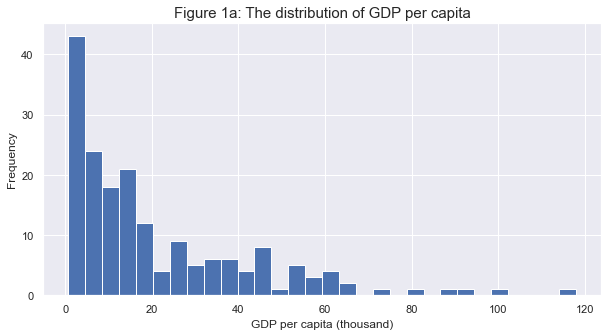

In [24]:
df['GDP_per_capita (thousand)'].hist(figsize=(10,5),bins=30,)
plt.title("Figure 1a: The distribution of GDP per capita", fontsize=15) 
plt.xlabel("GDP per capita (thousand)", fontsize=12) 
plt.ylabel("Frequency", fontsize=12)  

(b) Histogram of log (GDP per capita)

Text(0, 0.5, 'Frequency')

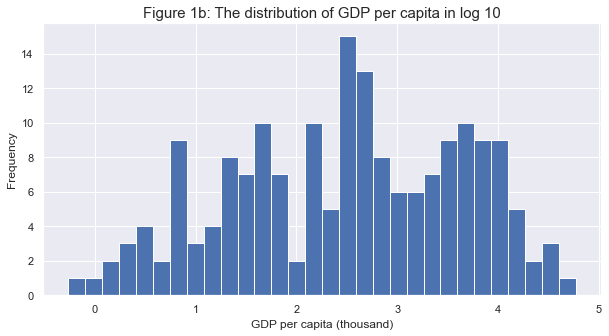

In [25]:
df['log_gdp'].hist(figsize=(10,5),bins=30)
plt.title("Figure 1b: The distribution of GDP per capita in log 10", fontsize=15) 
plt.xlabel("GDP per capita (thousand)", fontsize=12) 
plt.ylabel("Frequency", fontsize=12)

### Figure 2 Life expectancy and GDP per capita

(a) Life expectancy and (GDP per capita)

'The preceding screenshot shows a strong correlation between these two variables. However, there are some outliers that we can easily spot from the graph.'

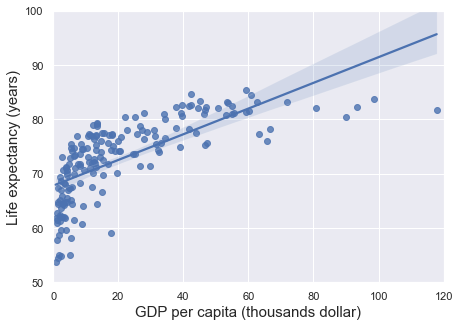

In [26]:
plt.figure(figsize=(7, 5))
sns.regplot(df['GDP_per_capita (thousand)'], df['Life_expectancy'])
plt.xlabel("GDP per capita (thousands dollar)", fontsize=15) 
plt.ylabel("Life expectancy (years)", fontsize=15) 
plt.axis([0, 120, 50, 100])

'''The preceding screenshot shows a strong correlation between these two variables. However, there are some outliers that we can easily spot from the graph.'''

(b) Life expectancy and ln (GDP per capita)

(-0.5, 5.0, 50.0, 85.0)

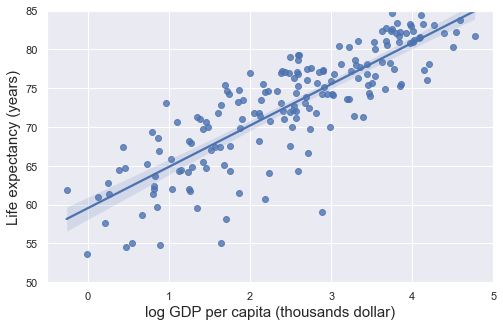

In [27]:
plt.figure(figsize=(8, 5))
sns.regplot(df['log_gdp'],df['Life_expectancy'])
plt.xlabel("log GDP per capita (thousands dollar)", fontsize=15) 
plt.ylabel("Life expectancy (years)", fontsize=15) 
plt.axis([-0.5, 5, 50, 85])